In [2]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio

In [3]:
#import train data sets
las1=lasio.read("well-log-data/15_9-13.las")
las2=lasio.read("well-log-data/16_8-1.las")
las3=lasio.read("well-log-data/25_11-5.las")
las4=lasio.read("well-log-data/25_6-3 (1).las")

In [4]:
#convert las file into pd data frame
df1=las1.df()
df2=las2.df()
df3=las3.df()
df4=las4.df()

In [5]:
df4.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RMIC,SP,DTS,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
138.099729,NaN,NaN,NaN,NaN,NaN,32.879009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.251729,NaN,NaN,NaN,NaN,NaN,32.929207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.403729,NaN,NaN,NaN,NaN,NaN,32.979416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.555729,NaN,NaN,NaN,NaN,NaN,33.029613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.707729,NaN,NaN,NaN,NaN,NaN,33.117496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df1)

          FORCE_2020_LITHOFACIES_CONFIDENCE  FORCE_2020_LITHOFACIES_LITHOLOGY  \
DEPT                                                                            
25.000                                  NaN                               NaN   
25.152                                  NaN                               NaN   
25.304                                  NaN                               NaN   
25.456                                  NaN                               NaN   
25.608                                  NaN                               NaN   
...                                     ...                               ...   
3283.272                                NaN                               NaN   
3283.424                                NaN                               NaN   
3283.576                                NaN                               NaN   
3283.728                                NaN                               NaN   
3283.880                    

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RSHA                               1623 non-null   float64
 7   RMED                               20957 non-null  float64
 8   RXO                                1627 non-null   float64
 9   SP                                 20956 non-null  float64
 10  DTC                                21282 non-null  float64
 11  NPHI                               14105 non-null  flo

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  6700 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   6685 non-null   float64
 2   CALI                               6709 non-null   float64
 3   MUDWEIGHT                          13706 non-null  float64
 4   ROP                                14418 non-null  float64
 5   RDEP                               11888 non-null  float64
 6   RSHA                               11888 non-null  float64
 7   RMED                               11887 non-null  float64
 8   SP                                 11888 non-null  float64
 9   DTC                                13935 non-null  float64
 10  NPHI                               4987 non-null   float64
 11  GR                                 14540 

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  5059 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   5060 non-null   float64
 2   CALI                               11777 non-null  float64
 3   BS                                 13266 non-null  float64
 4   DCAL                               11777 non-null  float64
 5   MUDWEIGHT                          12783 non-null  float64
 6   ROP                                12807 non-null  float64
 7   RDEP                               11730 non-null  float64
 8   RMED                               11731 non-null  float64
 9   SP                                 11686 non-null  float64
 10  DTC                                10571 non-null  float64
 11  NPHI                               6660 n

In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RSHA                               8245 non-null   float64
 8   RMED                               14972 non-null  float64
 9   RMIC                               8246 non-null   float64
 10  SP                                 5020 non-null   float64
 11  DTS                                12119 

In [11]:
df1.isna().sum()


FORCE_2020_LITHOFACIES_CONFIDENCE     3164
FORCE_2020_LITHOFACIES_LITHOLOGY      3171
CALI                                  3096
MUDWEIGHT                             3921
ROP                                   1144
RDEP                                   485
RSHA                                 19818
RMED                                   484
RXO                                  19814
SP                                     485
DTC                                    159
NPHI                                  7336
PEF                                   4995
GR                                     541
RHOB                                  3096
DRHO                                  3096
DEPTH_MD                               485
X_LOC                                  485
Y_LOC                                  485
Z_LOC                                  485
dtype: int64

In [12]:
df2.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    7886
FORCE_2020_LITHOFACIES_LITHOLOGY     7901
CALI                                 7877
MUDWEIGHT                             880
ROP                                   168
RDEP                                 2698
RSHA                                 2698
RMED                                 2699
SP                                   2698
DTC                                   651
NPHI                                 9599
GR                                     46
RHOB                                 7877
DRHO                                 7874
DEPTH_MD                             2698
X_LOC                                2698
Y_LOC                                2698
Z_LOC                                2698
dtype: int64

In [13]:
df3.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    8278
FORCE_2020_LITHOFACIES_LITHOLOGY     8277
CALI                                 1560
BS                                     71
DCAL                                 1560
MUDWEIGHT                             554
ROP                                   530
RDEP                                 1607
RMED                                 1606
SP                                   1651
DTC                                  2766
NPHI                                 6677
GR                                     58
RHOB                                 8178
DRHO                                 8180
DEPTH_MD                             1607
X_LOC                                1607
Y_LOC                                1607
Z_LOC                                1607
dtype: int64

In [14]:
df4.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE     3379
FORCE_2020_LITHOFACIES_LITHOLOGY      3394
CALI                                  3349
BS                                     328
MUDWEIGHT                             7158
ROP                                     16
RDEP                                   375
RSHA                                  7143
RMED                                   416
RMIC                                  7142
SP                                   10368
DTS                                   3269
DTC                                   3218
NPHI                                  7167
GR                                     494
RHOB                                  7141
DEPTH_MD                               375
X_LOC                                  375
Y_LOC                                  375
Z_LOC                                  375
dtype: int64

# Drop columns with < 70% entry

In [15]:
df1=df1.drop(["RSHA", "RXO", "RHOB","DRHO"], axis=1)

In [16]:
df2=df2.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "RHOB", "DRHO"], axis=1)

In [17]:
df3=df3.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "RHOB", "DRHO"], axis=1)

In [18]:
df4=df4.drop(["RSHA", "RMIC", "RHOB"], axis=1)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RMED                               20957 non-null  float64
 7   SP                                 20956 non-null  float64
 8   DTC                                21282 non-null  float64
 9   NPHI                               14105 non-null  float64
 10  PEF                                16446 non-null  float64
 11  GR                                 20900 non-null  flo

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       6709 non-null   float64
 1   MUDWEIGHT  13706 non-null  float64
 2   ROP        14418 non-null  float64
 3   RDEP       11888 non-null  float64
 4   RSHA       11888 non-null  float64
 5   RMED       11887 non-null  float64
 6   SP         11888 non-null  float64
 7   DTC        13935 non-null  float64
 8   NPHI       4987 non-null   float64
 9   GR         14540 non-null  float64
 10  DEPTH_MD   11888 non-null  float64
 11  X_LOC      11888 non-null  float64
 12  Y_LOC      11888 non-null  float64
 13  Z_LOC      11888 non-null  float64
dtypes: float64(14)
memory usage: 1.7 MB


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       11777 non-null  float64
 1   BS         13266 non-null  float64
 2   DCAL       11777 non-null  float64
 3   MUDWEIGHT  12783 non-null  float64
 4   ROP        12807 non-null  float64
 5   RDEP       11730 non-null  float64
 6   RMED       11731 non-null  float64
 7   SP         11686 non-null  float64
 8   DTC        10571 non-null  float64
 9   NPHI       6660 non-null   float64
 10  GR         13279 non-null  float64
 11  DEPTH_MD   11730 non-null  float64
 12  X_LOC      11730 non-null  float64
 13  Y_LOC      11730 non-null  float64
 14  Z_LOC      11730 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB


In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RMED                               14972 non-null  float64
 8   SP                                 5020 non-null   float64
 9   DTS                                12119 non-null  float64
 10  DTC                                12170 non-null  float64
 11  NPHI                               8221 n

# Drop column that's not mutual with all data set

In [23]:
df1 = df1.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "PEF","MUDWEIGHT", "SP"], axis=1)
df2 = df2.drop(["RSHA","MUDWEIGHT", "SP"], axis=1)
df3 = df3.drop(["BS", "DCAL","MUDWEIGHT", "SP"], axis=1)
df4 = df4.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "BS", "DTS","MUDWEIGHT", "SP"], axis=1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      18345 non-null  float64
 1   ROP       20297 non-null  float64
 2   RDEP      20956 non-null  float64
 3   RMED      20957 non-null  float64
 4   DTC       21282 non-null  float64
 5   NPHI      14105 non-null  float64
 6   GR        20900 non-null  float64
 7   DEPTH_MD  20956 non-null  float64
 8   X_LOC     20956 non-null  float64
 9   Y_LOC     20956 non-null  float64
 10  Z_LOC     20956 non-null  float64
dtypes: float64(11)
memory usage: 2.0 MB


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      6709 non-null   float64
 1   ROP       14418 non-null  float64
 2   RDEP      11888 non-null  float64
 3   RMED      11887 non-null  float64
 4   DTC       13935 non-null  float64
 5   NPHI      4987 non-null   float64
 6   GR        14540 non-null  float64
 7   DEPTH_MD  11888 non-null  float64
 8   X_LOC     11888 non-null  float64
 9   Y_LOC     11888 non-null  float64
 10  Z_LOC     11888 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      11777 non-null  float64
 1   ROP       12807 non-null  float64
 2   RDEP      11730 non-null  float64
 3   RMED      11731 non-null  float64
 4   DTC       10571 non-null  float64
 5   NPHI      6660 non-null   float64
 6   GR        13279 non-null  float64
 7   DEPTH_MD  11730 non-null  float64
 8   X_LOC     11730 non-null  float64
 9   Y_LOC     11730 non-null  float64
 10  Z_LOC     11730 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      12039 non-null  float64
 1   ROP       15372 non-null  float64
 2   RDEP      15013 non-null  float64
 3   RMED      14972 non-null  float64
 4   DTC       12170 non-null  float64
 5   NPHI      8221 non-null   float64
 6   GR        14894 non-null  float64
 7   DEPTH_MD  15013 non-null  float64
 8   X_LOC     15013 non-null  float64
 9   Y_LOC     15013 non-null  float64
 10  Z_LOC     15013 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [28]:
display(df1.shape, df2.shape, df3.shape, df4.shape)

(21441, 11)

(14586, 11)

(13337, 11)

(15388, 11)

In [29]:
joint_df=pd.concat([df1,df2,df3,df4])
joint_df.shape

(64752, 11)

In [30]:
joint_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      48870 non-null  float64
 1   ROP       62894 non-null  float64
 2   RDEP      59587 non-null  float64
 3   RMED      59547 non-null  float64
 4   DTC       57958 non-null  float64
 5   NPHI      33973 non-null  float64
 6   GR        63613 non-null  float64
 7   DEPTH_MD  59587 non-null  float64
 8   X_LOC     59587 non-null  float64
 9   Y_LOC     59587 non-null  float64
 10  Z_LOC     59587 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [31]:
joint_df.describe()

,CALI,ROP,RDEP,RMED,DTC,NPHI,GR,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,48870.000000,62894.000000,59587.000000,59547.000000,57958.000000,33973.000000,63613.000000,59587.000000,59587.000000,5.958700e+04,59587.000000
mean,12.788625,54.393476,1.517735,1.426824,135.579075,0.435766,59.023666,1463.878902,463239.391666,6.527961e+06,-1438.956239
std,3.585482,87.445839,2.061031,1.914200,27.794104,0.136695,26.662202,736.781811,22338.931773,6.243687e+04,736.529411
min,7.073111,0.138586,0.202688,0.116862,50.758595,-0.032620,0.624403,98.720001,437592.906250,6.470972e+06,-3257.997803
25%,9.413469,7.321400,0.772081,0.767704,121.810505,0.339636,39.822582,862.483612,437640.843750,6.470982e+06,-1969.635498
50%,12.593809,31.279211,1.154419,1.121041,142.874123,0.451603,59.197601,1428.567993,463756.000000,6.479872e+06,-1403.708740
75%,14.212363,53.346992,1.665462,1.553793,151.725235,0.524652,75.684013,1994.620361,495696.468750,6.618248e+06,-837.791046
max,23.329569,1083.425415,168.014252,142.606338,206.225693,0.993175,499.022583,3283.879883,495739.343750,6.618270e+06,-73.719467


In [32]:
joint_df.isna().sum()

CALI        15882
ROP          1858
RDEP         5165
RMED         5205
DTC          6794
NPHI        30779
GR           1139
DEPTH_MD     5165
X_LOC        5165
Y_LOC        5165
Z_LOC        5165
dtype: int64

In [33]:
joint_df.head()

,CALI,ROP,RDEP,RMED,DTC,NPHI,GR,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,
25.000,NaN,NaN,NaN,NaN,206.224609,NaN,NaN,NaN,NaN,NaN,NaN
25.152,NaN,NaN,NaN,NaN,206.224625,NaN,NaN,NaN,NaN,NaN,NaN
25.304,NaN,NaN,NaN,NaN,206.224655,NaN,NaN,NaN,NaN,NaN,NaN
25.456,NaN,NaN,NaN,NaN,206.224670,NaN,NaN,NaN,NaN,NaN,NaN
25.608,NaN,NaN,NaN,NaN,206.224701,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
joint_df["GR"]= joint_df.GR
joint_df = joint_df.dropna(subset=['GR'])
joint_df.isna().sum()

CALI        14892
ROP          1227
RDEP         4304
RMED         4344
DTC          6255
NPHI        29746
GR              0
DEPTH_MD     4304
X_LOC        4304
Y_LOC        4304
Z_LOC        4304
dtype: int64

In [35]:
joint_df.shape

(63613, 11)

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=joint_df.drop(["GR"], axis=1)
y=joint_df["GR"]

#Train data
x_train, y_train= (x,y)

#select a model
model=xgb.XGBRegressor()

#fit data
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
#import data set for testing
las5=lasio.read("well-log-data/31_2-21 S.las")
df5=las5.df()
df5.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,ROPA,ROP,RDEP,RMED,DTS,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,
372.0084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372.1604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372.3124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372.4644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372.6164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   BS                                 18674 non-null  float64
 4   ROPA                               18680 non-null  float64
 5   ROP                                18664 non-null  float64
 6   RDEP                               18567 non-null  float64
 7   RMED                               18524 non-null  float64
 8   DTS                                15252 non-null  float64
 9   DTC                                18199 non-null  float64
 10  NPHI                               7835 non-null   float64
 11  PEF                                7800 non-null

In [39]:
df5.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "PEF", "BS", "DTS", "ROPA","RHOB", "DRHO"], axis=1, inplace=True)

In [40]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      7842 non-null   float64
 1   ROP       18664 non-null  float64
 2   RDEP      18567 non-null  float64
 3   RMED      18524 non-null  float64
 4   DTC       18199 non-null  float64
 5   NPHI      7835 non-null   float64
 6   GR        18666 non-null  float64
 7   DEPTH_MD  18567 non-null  float64
 8   X_LOC     18567 non-null  float64
 9   Y_LOC     18567 non-null  float64
 10  Z_LOC     18567 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [41]:
df5.shape

(18731, 11)

In [42]:
df5.dropna(inplace=True)
df5.shape

(7684, 11)

In [43]:
df5.isna().sum()

CALI        0
ROP         0
RDEP        0
RMED        0
DTC         0
NPHI        0
GR          0
DEPTH_MD    0
X_LOC       0
Y_LOC       0
Z_LOC       0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=df5.drop(["GR"], axis=1)
Y=df5["GR"]

#Test data
x_test, y_test= (X,Y)

#select a model
model=xgb.XGBRegressor()

#fit Model
model.fit(x_train, y_train)

#Score model
model.score(x_test, y_test)

-0.7425404946322522

# Let's try something else

In [45]:
merged_df=joint_df.dropna()
merged_df.isna().sum()

CALI        0
ROP         0
RDEP        0
RMED        0
DTC         0
NPHI        0
GR          0
DEPTH_MD    0
X_LOC       0
Y_LOC       0
Z_LOC       0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=merged_df.drop(["GR"], axis=1)
y=merged_df["GR"]

#Train data
x_train, y_train= (x,y)

#select a model
model2=xgb.XGBRegressor()

#fit data
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=df5.drop(["GR"], axis=1)
Y=df5["GR"]

#Test data
x_test, y_test= (X,Y)

#select a model
model2=xgb.XGBRegressor()

#fit Model
model2.fit(x_train, y_train)

#Score model
model2.score(x_test, y_test)

-1.0237487542040906

In [48]:
joint_df.head()

,CALI,ROP,RDEP,RMED,DTC,NPHI,GR,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,
98.568,NaN,NaN,NaN,0.410763,206.222244,NaN,13.795514,NaN,NaN,NaN,NaN
98.720,NaN,NaN,8.0156,0.363398,206.221832,NaN,14.668177,98.720001,437642.15625,6470975.5,-73.719467
98.872,NaN,NaN,8.0156,0.340800,206.222977,NaN,14.063663,98.872002,437642.15625,6470975.5,-73.871468
99.024,NaN,NaN,8.0156,0.374822,206.224121,NaN,13.762383,99.024002,437642.15625,6470975.5,-74.023460
99.176,NaN,NaN,8.0156,0.421777,206.225281,NaN,13.474093,99.176003,437642.15625,6470975.5,-74.175461


In [49]:
y_test

DEPT
1999.7764    73.137222
1999.9284    53.532814
2000.0804    44.329887
2000.2324    34.112160
2000.3844    31.661253
               ...    
3167.5924    46.135769
3167.7444    46.611904
3167.8964    48.699074
3168.0484    49.518017
3168.2004    47.866756
Name: GR, Length: 7684, dtype: float64

In [50]:
y_test.mean()

93.84311629173439

**predict model**

In [51]:
model.fit(x_train, y_train)
model.predict(x_test)
np.array(y_test)

array([73.13722229, 53.53281403, 44.32988739, ..., 48.69907379,
       49.51801682, 47.86675644])

In [52]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
np.mean(y_pred==y_test)

0.0

**Evaluate model**

In [53]:
#Rsquared coefficient of determination is a statistical measure that represents the proportion of the variance in the target
#that is explained by the features in a regression model.

from sklearn.metrics import r2_score

#create an array with y_test mean
y_test_mean= np.full(len(y_test), y_test.mean())

y_test_mean[:8]

array([93.84311629, 93.84311629, 93.84311629, 93.84311629, 93.84311629,
       93.84311629, 93.84311629, 93.84311629])

In [54]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [55]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [56]:
df=pd.DataFrame(data={"actual values":y_test, "predicted values":y_pred})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
DEPT,,,
1999.7764,73.137222,56.567051,-16.570171
1999.9284,53.532814,55.648621,2.115807
2000.0804,44.329887,60.179100,15.849213
2000.2324,34.112160,65.379738,31.267578
2000.3844,31.661253,59.916641,28.255388
2000.5364,33.186008,58.528385,25.342377
2000.6884,34.737228,52.665287,17.928059
2000.8404,40.396976,55.309162,14.912186
2000.9924,51.308205,70.973984,19.665779


In [57]:
np.abs(df["differences"]).mean()

44.872821205923685

In [58]:
#Evaluation using MSE
# MSE is the average of the absolute differences between predictions and actual values.
#It gives you an idea of how wrong your model predictions are

from sklearn.metrics import mean_squared_error
y_pred=model.predict(x_test)
mse= mean_squared_error(y_test, y_pred)
mse

2745.078945992853

In [59]:
df["squared_difference"]=np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,squared_difference
DEPT,,,,
1999.7764,73.137222,56.567051,-16.570171,274.570579
1999.9284,53.532814,55.648621,2.115807,4.476637
2000.0804,44.329887,60.179100,15.849213,251.197542
2000.2324,34.112160,65.379738,31.267578,977.661442
2000.3844,31.661253,59.916641,28.255388,798.366966
2000.5364,33.186008,58.528385,25.342377,642.236057
2000.6884,34.737228,52.665287,17.928059,321.415286
2000.8404,40.396976,55.309162,14.912186,222.373281
2000.9924,51.308205,70.973984,19.665779,386.742868


# Try another model

In [60]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(x_train,y_train)
model3.score(x_test,y_test)


-0.8066518029756147

# Plot the actual and predicted Gamma log values to compare their similiraities and differences

In [61]:
df

,actual values,predicted values,differences,squared_difference
DEPT,,,,
1999.7764,73.137222,56.567051,-16.570171,274.570579
1999.9284,53.532814,55.648621,2.115807,4.476637
2000.0804,44.329887,60.179100,15.849213,251.197542
2000.2324,34.112160,65.379738,31.267578,977.661442
2000.3844,31.661253,59.916641,28.255388,798.366966
...,...,...,...,...
3167.5924,46.135769,145.637466,99.501698,9900.587813
3167.7444,46.611904,114.699074,68.087170,4635.862671
3167.8964,48.699074,92.021919,43.322845,1876.868939


In [65]:
df.to_csv("new_df", index=True)

In [66]:
new_df= pd.read_csv("new_df")
new_df.head()

,DEPT,actual values,predicted values,differences,squared_difference
0,1999.7764,73.137222,56.56705,-16.570171,274.570579
1,1999.9284,53.532814,55.64862,2.115807,4.476637
2,2000.0804,44.329887,60.17910,15.849213,251.197542
3,2000.2324,34.112160,65.37974,31.267578,977.661442
4,2000.3844,31.661253,59.91664,28.255388,798.366966


Text(0.5, 1.0, 'Comparison Between Actual and Predicted Gamma Log Value')

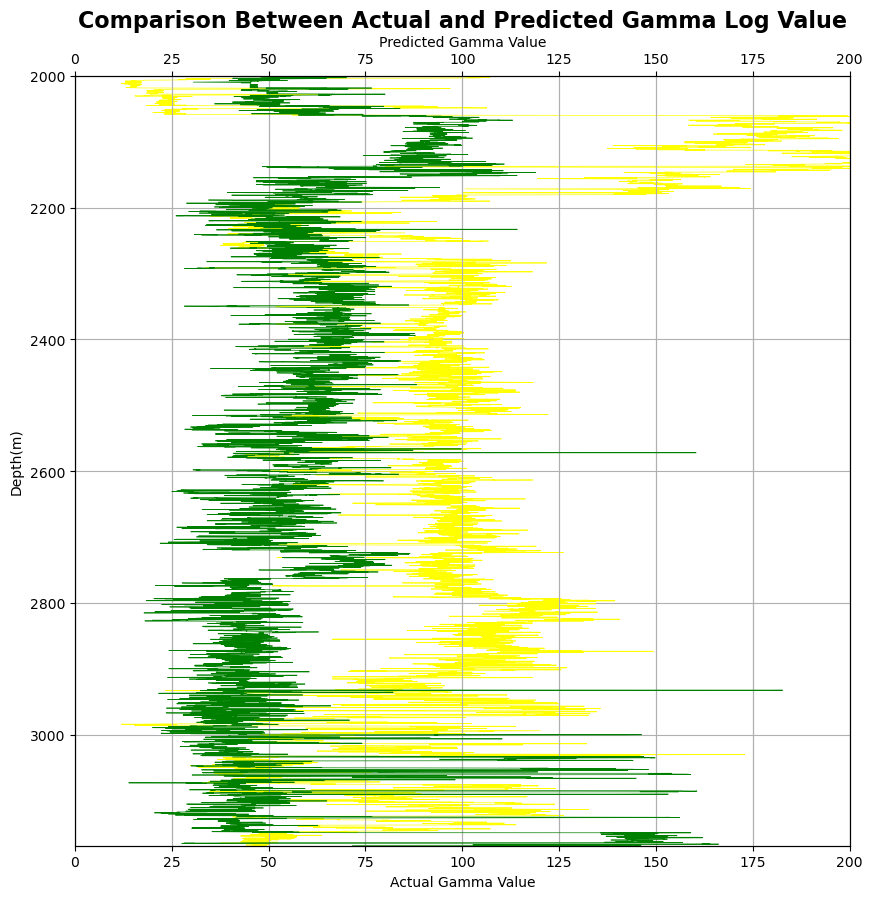

In [71]:
fig, ((ax1))= plt.subplots(nrows=1,
                                    ncols=1,
                                    figsize=(10,10))

ax1.plot("actual values", "DEPT", data=new_df, color="yellow", lw=0.5)
ax1.set(xlabel="Actual Gamma Value",
      ylabel="Depth(m)",
       xlim=(0, 200),
       ylim=(3168.2004, 1999.7764))
ax1.grid()

    
ax2=ax1.twiny()
ax2.plot("predicted values", "DEPT", data=new_df, color="green", lw=0.5)
ax2.set(xlabel="Predicted Gamma Value",
        xlim=(0, 200),
       ylim=(3168.2004, 1999.7764))
ax2.grid()


#ax1.xaxis.set_label_position("top")
#ax2.xaxis.set_label_position("top")


plt.title("Comparison Between Actual and Predicted Gamma Log Value", fontsize=16, fontweight='bold', color='black')
